In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
%matplotlib inline
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/komal_albhar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/komal_albhar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,effectiveness,sideEffectsReview,commentsReview,sideEffects
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Considerably Effective,SOMETIMES TROUBLE BREATHING AND TROUBLE URINAT...,"I used five rings daily, before every intimate...",Extremely Severe Side Effects
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Marginally Effective,"muscle pain, loss of mobility, depresion, head...",I take the drug once a day at night with a sma...,Extremely Severe Side Effects
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Moderately Effective,I have only had one side effect due to mixing ...,Just take the pills every 8 hours to tame the ...,Moderate Side Effects
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10,Considerably Effective,"reddness, flaking, sensitive skin. Was not abl...",take once per day in the morning,Moderate Side Effects
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Considerably Effective,My only major complaint is that since Suboxone...,This was part of a treatment for Adult ADD. I...,Extremely Severe Side Effects


In [4]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'effectiveness', 'sideEffectsReview', 'commentsReview',
       'sideEffects'],
      dtype='object')

In [5]:
data.describe()

,rating
count,164403.000000
mean,6.994635
std,3.266290
min,1.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,10.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164403 entries, 0 to 164402
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   uniqueID           164403 non-null  object
 1   drugName           164403 non-null  object
 2   condition          163503 non-null  object
 3   review             164403 non-null  object
 4   rating             164403 non-null  int64 
 5   date               164403 non-null  object
 6   usefulCount        164403 non-null  object
 7   effectiveness      164403 non-null  object
 8   sideEffectsReview  164403 non-null  object
 9   commentsReview     164403 non-null  object
 10  sideEffects        164403 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.8+ MB


In [7]:
data.dtypes

uniqueID             object
drugName             object
condition            object
review               object
rating                int64
date                 object
usefulCount          object
effectiveness        object
sideEffectsReview    object
commentsReview       object
sideEffects          object
dtype: object

In [8]:
data.isnull().any()

uniqueID             False
drugName             False
condition             True
review               False
rating               False
date                 False
usefulCount          False
effectiveness        False
sideEffectsReview    False
commentsReview       False
sideEffects          False
dtype: bool

In [9]:
data.isnull().sum()

uniqueID               0
drugName               0
condition            900
review                 0
rating                 0
date                   0
usefulCount            0
effectiveness          0
sideEffectsReview      0
commentsReview         0
sideEffects            0
dtype: int64

In [10]:
data.shape

(164403, 11)

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().any()

uniqueID             False
drugName             False
condition            False
review               False
rating               False
date                 False
usefulCount          False
effectiveness        False
sideEffectsReview    False
commentsReview       False
sideEffects          False
dtype: bool

In [13]:
data.shape

(163503, 11)

In [14]:
data.duplicated().sum()

31

In [15]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [16]:
keep_conditions = ["ADHD", "Anxiety", "Insomnia","Weight Loss","Migraine", "Obesity","Depression", "High Blood Pressure", "Diabetes, Type 2"]

# Filter the DataFrame to only keep the records with the specified conditions
df = data[data['condition'].isin(keep_conditions)]

df.drop(['uniqueID'],axis =1,inplace=True)

df.head()

,drugName,condition,review,rating,date,usefulCount,effectiveness,sideEffectsReview,commentsReview,sideEffects
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Marginally Effective,"muscle pain, loss of mobility, depresion, head...",I take the drug once a day at night with a sma...,Extremely Severe Side Effects
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,09-Mar-17,54,Highly Effective,Increased risks for breast cancer and conditio...,Prescribed to take whenever flare-up for perio...,Extremely Severe Side Effects
15,Liraglutide,Obesity,"""I have been taking Saxenda since July 2016. ...",9,19-Jan-17,20,Highly Effective,Mild drowsiness accompanied by a sense of well...,took one 5mg tablet daily in the am,No Side Effects
21,Trazodone,Insomnia,"""I have insomnia, it&#039;s horrible. My story...",10,03-Apr-16,43,Moderately Effective,I have found that if I take it too early prior...,I pill a day and all has been well. =D,Mild Side Effects
27,Daytrana,ADHD,"""Hi all, My son who is 12 was diagnosed when h...",10,12-Jan-17,11,Ineffective,I always experiencing oily bowel movement. I s...,The initial skin infection is clearing up.,Mild Side Effects


In [17]:
df.shape

(35774, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35774 entries, 1 to 161289
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   drugName           35774 non-null  object
 1   condition          35774 non-null  object
 2   review             35774 non-null  object
 3   rating             35774 non-null  int64 
 4   date               35774 non-null  object
 5   usefulCount        35774 non-null  object
 6   effectiveness      35774 non-null  object
 7   sideEffectsReview  35774 non-null  object
 8   commentsReview     35774 non-null  object
 9   sideEffects        35774 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.0+ MB


In [19]:
# Top 20 most popular drugs
df['drugName'].value_counts().nlargest(20)

Phentermine               1515
Bupropion / naltrexone     945
Contrave                   912
Escitalopram               864
Liraglutide                748
Lexapro                    678
Bupropion                  667
Venlafaxine                586
Lorcaserin                 572
Belviq                     562
Desvenlafaxine             515
Alprazolam                 489
Pristiq                    486
Trazodone                  481
Zolpidem                   477
Mirtazapine                475
Clonazepam                 462
Sertraline                 459
Duloxetine                 453
Cymbalta                   427
Name: drugName, dtype: int64

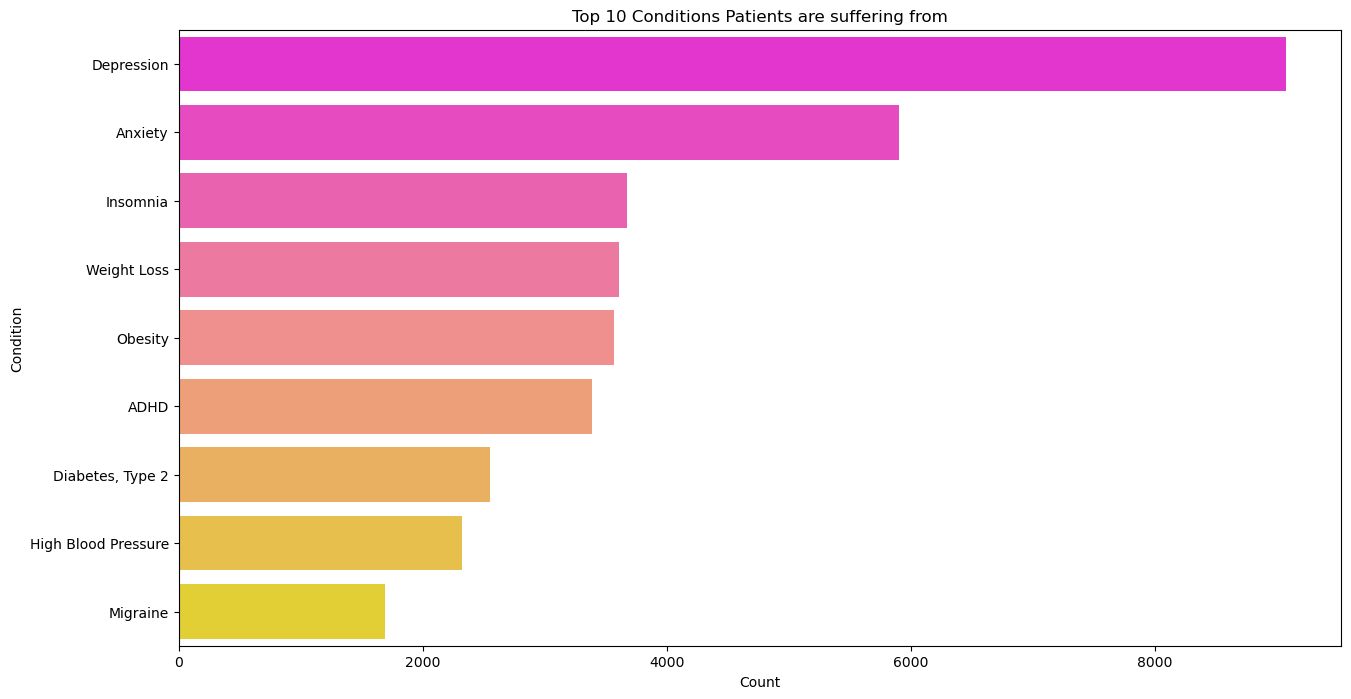

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, y='condition', order=df['condition'].value_counts().index[:10], palette="spring")
plt.title('Top 10 Conditions Patients are suffering from')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()

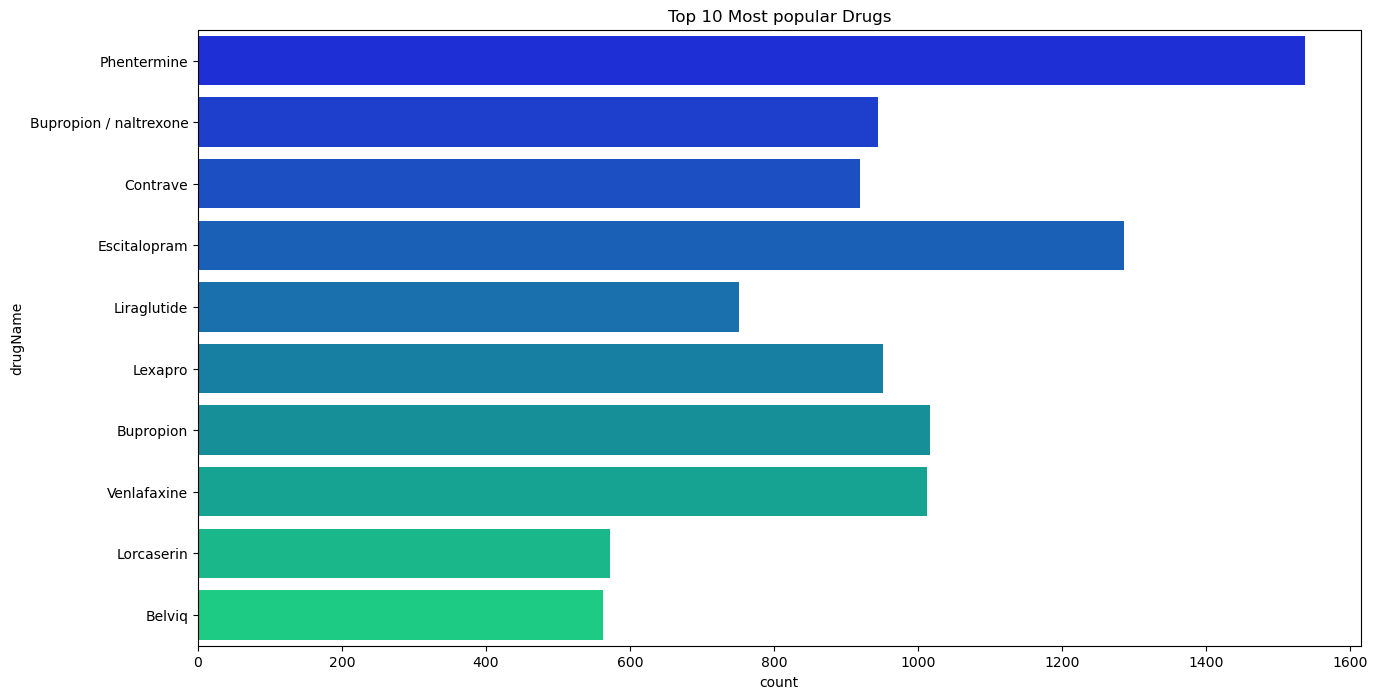

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, y='drugName', order=df['drugName'].value_counts().index[:10], palette="winter")
plt.title('Top 10 Most popular Drugs')
plt.show()

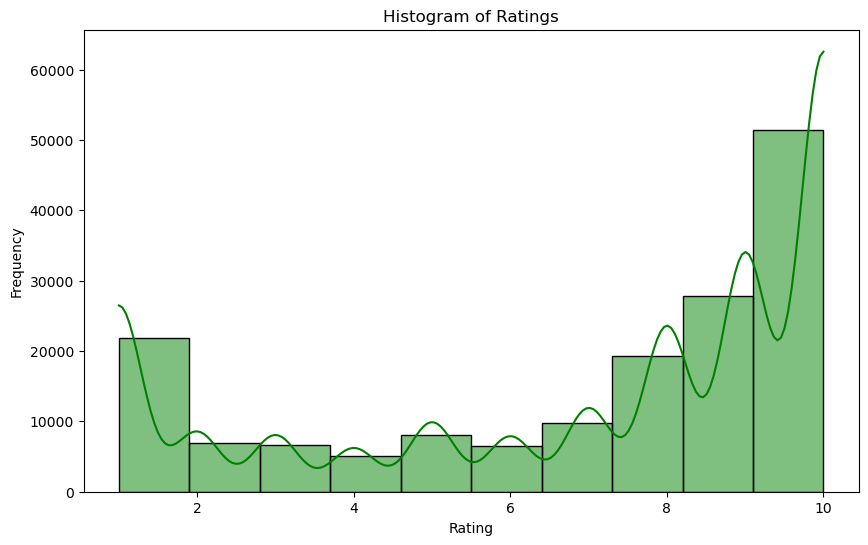

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='rating', bins=10, kde=True, color="green")
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

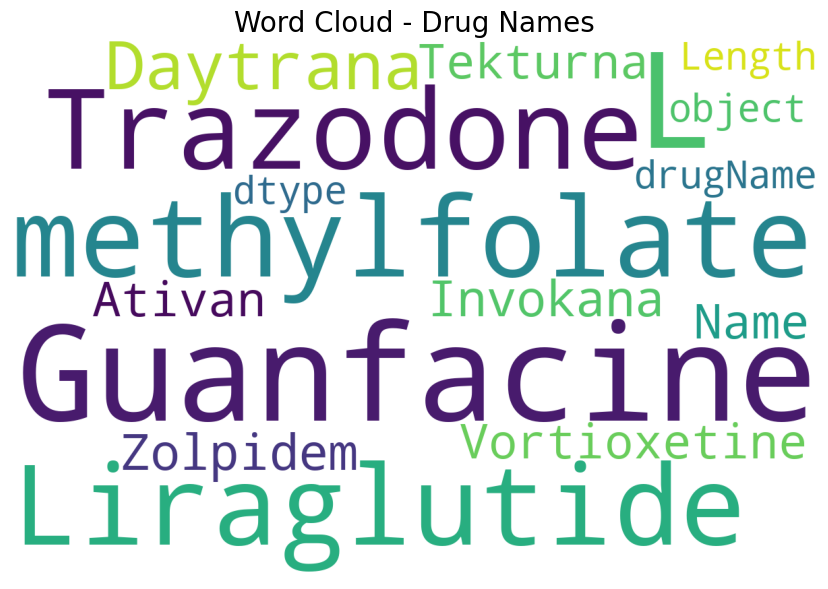

In [23]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Word Cloud - Drug Names', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

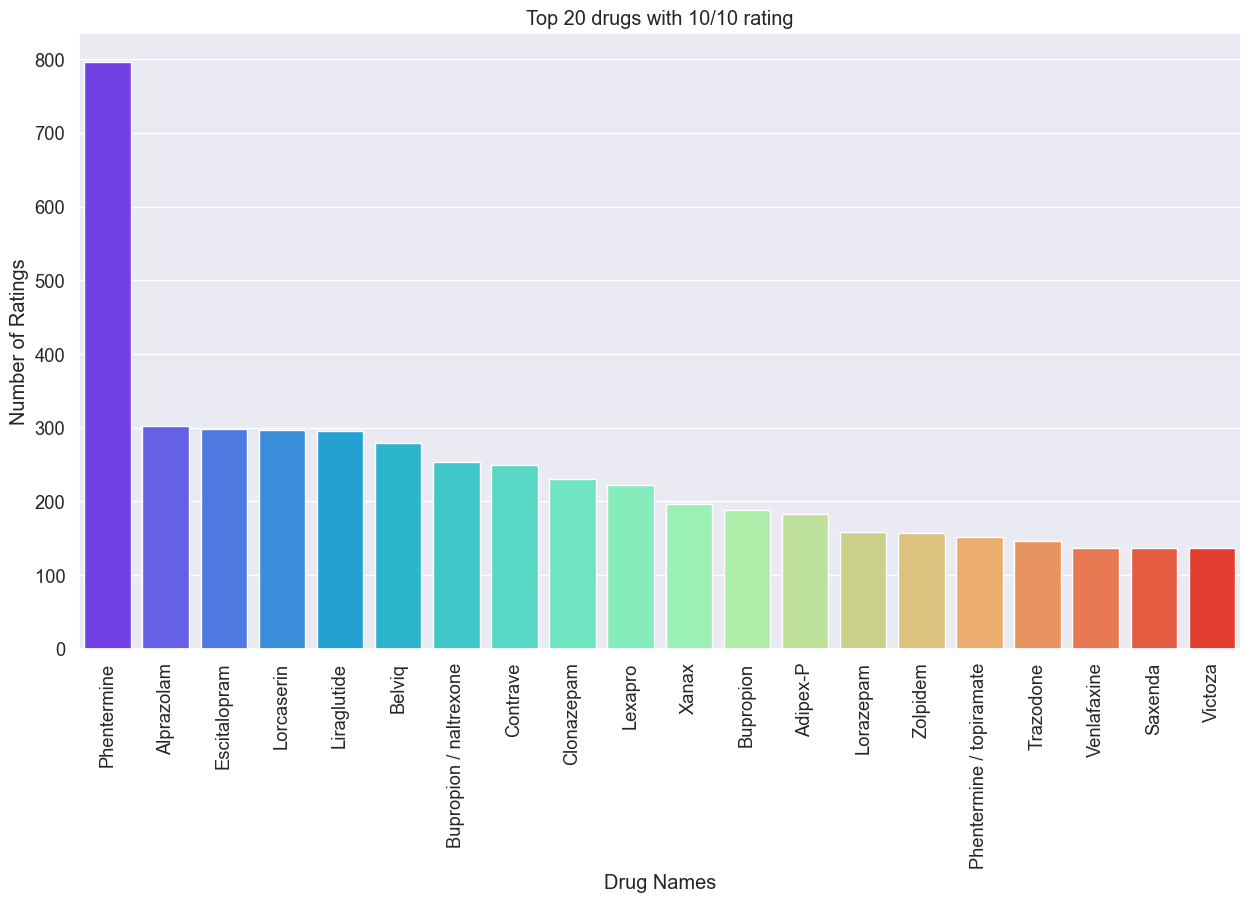

In [24]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'rainbow')

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

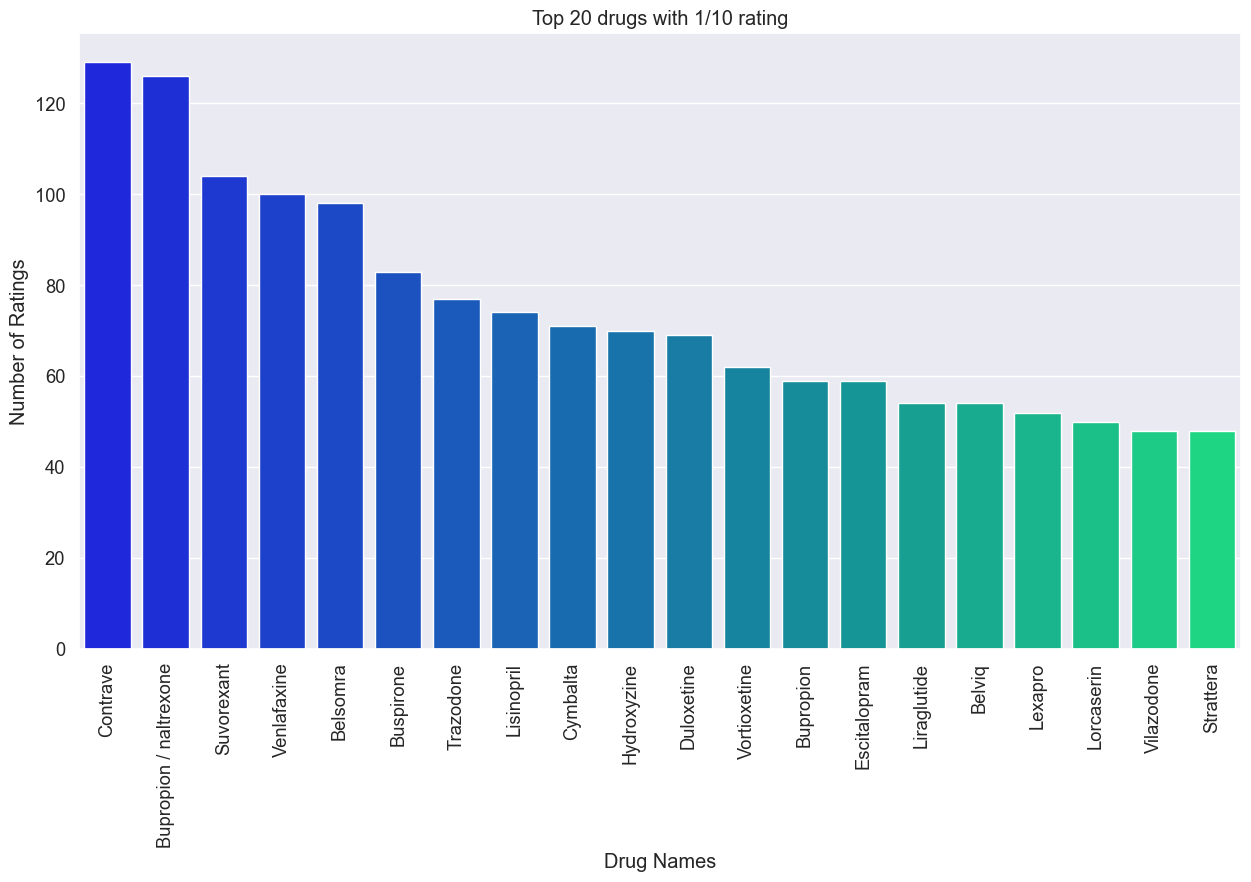

In [25]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

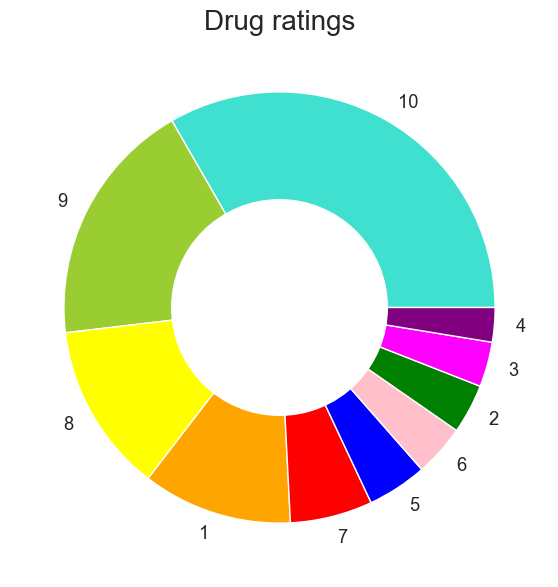

In [26]:
#Breakdown of all the ratings
ratings = df["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["turquoise","yellowgreen","yellow", "orange","red","blue","pink","green","magenta","purple"]
plt.figure(figsize=(7, 7))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Drug ratings", fontsize=20)
plt.show()

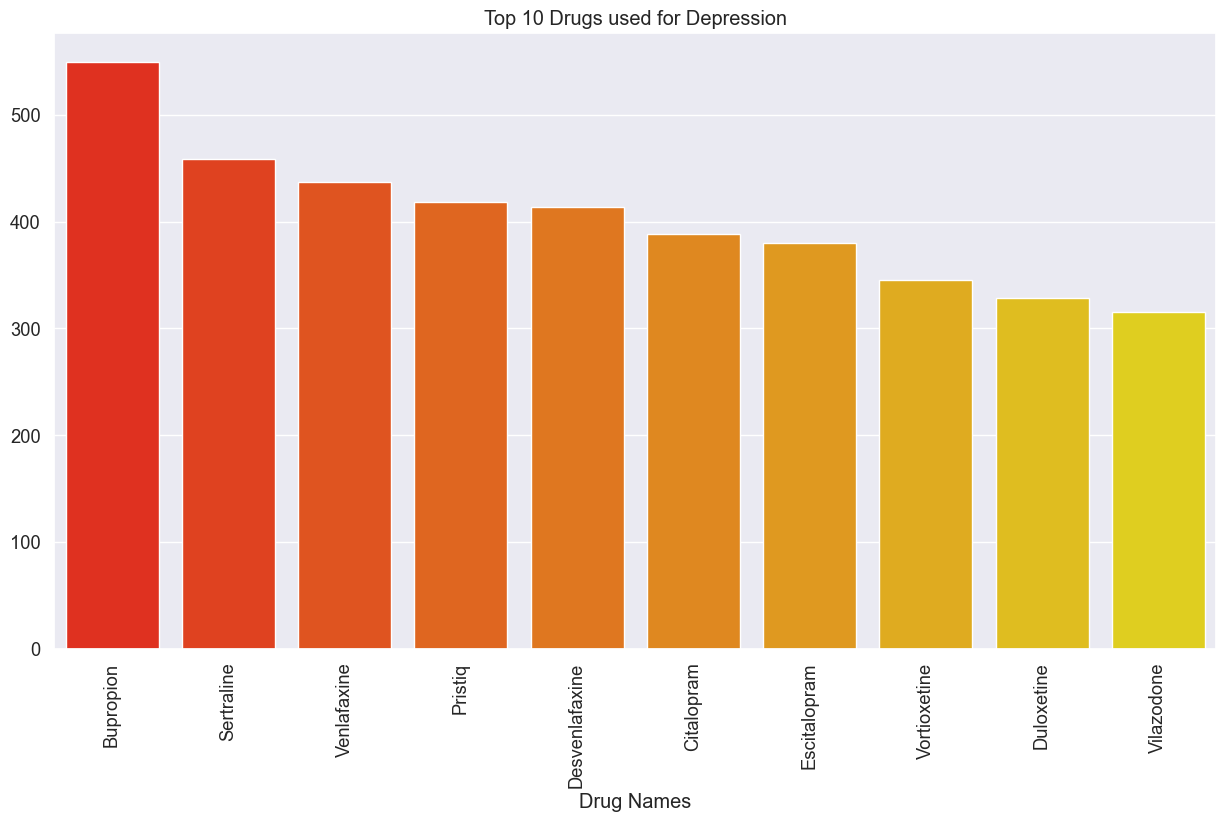

In [27]:
#Top 10 drugs which are used for the condition Depression
df1 = df[df['condition'] == 'Depression']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'autumn')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

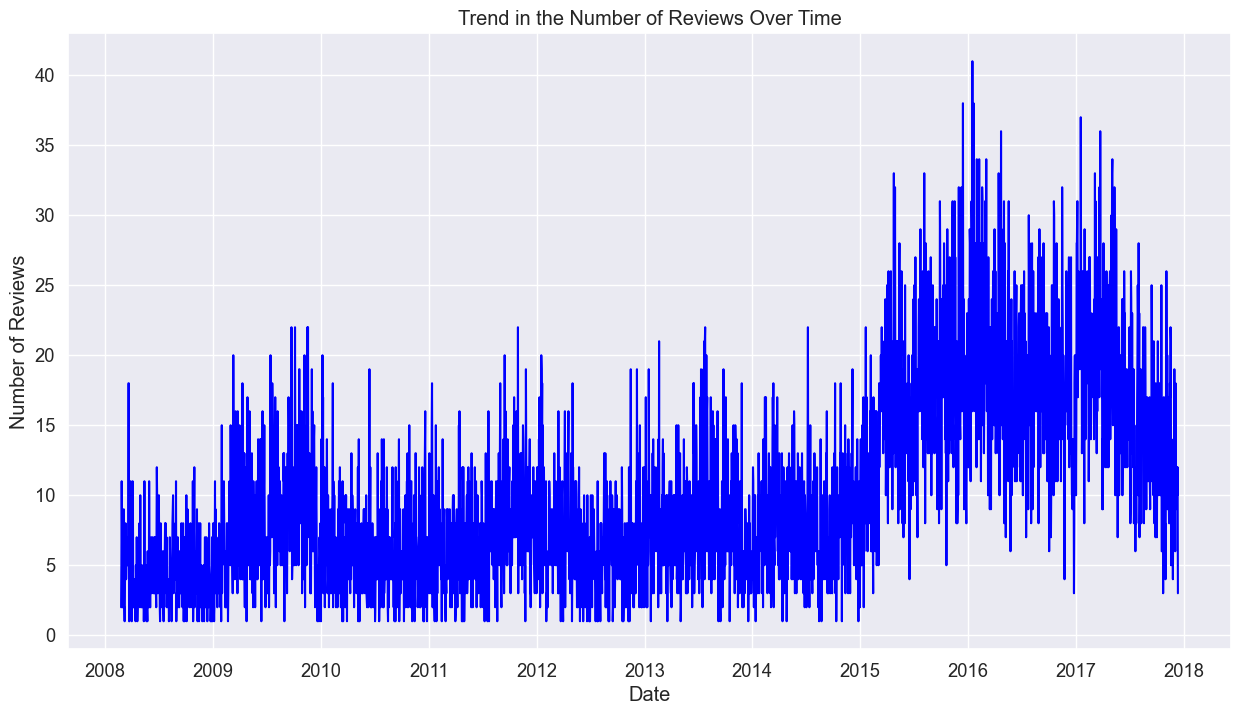

In [28]:
df['date'] = pd.to_datetime(df['date'])

# Group the data by date and count the number of reviews for each date
reviews_per_date = df.groupby(df['date'].dt.date).size().reset_index(name='counts')

# Plot a line chart of the trend in the number of reviews over time
plt.plot(reviews_per_date['date'], reviews_per_date['counts'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Trend in the Number of Reviews Over Time')
plt.show()

In [29]:
# let's make a new column named "review sentiment"

df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

1.0    28298
0.0     7476
Name: Review_Sentiment, dtype: int64

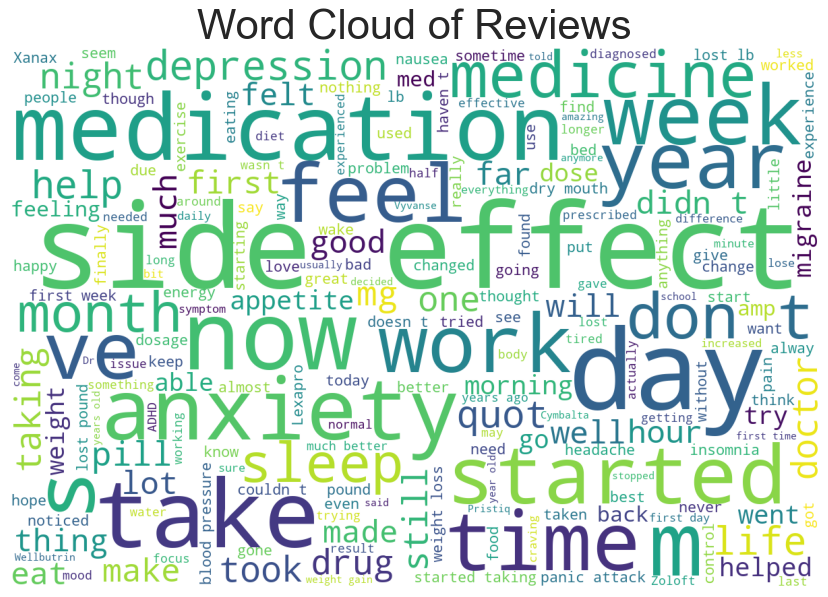

In [30]:
sentiments = " ".join([text for text in df['review'][df['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(sentiments)

plt.rcParams['figure.figsize'] = (20, 7)
plt.title('Word Cloud of Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [31]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [32]:
get_sentiment_label("I love this medicine")

'positive'

In [33]:
get_sentiment_label("I hate this medicine")

'negative'

In [34]:
# Sentiment Score for Review
df['sentiment'] = df['review'].apply(get_sentiment)

In [35]:
df['sentiment_label'] = df['review'].apply(get_sentiment_label)

In [36]:
df[['review','sentiment','sentiment_label']]

,review,sentiment,sentiment_label
1,"""My son is halfway through his fourth week of ...",0.168333,positive
11,"""I have taken anti-depressants for years, with...",0.275000,positive
15,"""I have been taking Saxenda since July 2016. ...",0.209259,positive
21,"""I have insomnia, it&#039;s horrible. My story...",0.061503,positive
27,"""Hi all, My son who is 12 was diagnosed when h...",0.070798,positive
...,...,...,...
161276,"""I started taking this medication 10 years ago...",-0.166667,negative
161277,"""I just got diagnosed with type 2. My doctor p...",0.048611,positive
161285,"""This is the third med I&#039;ve tried for anx...",-0.100694,negative
161286,"""I was super against taking medication. I&#039...",-0.046667,negative


In [44]:
df['sentiment_label'].value_counts()

positive    24346
negative     9957
neutral      1471
Name: sentiment_label, dtype: int64

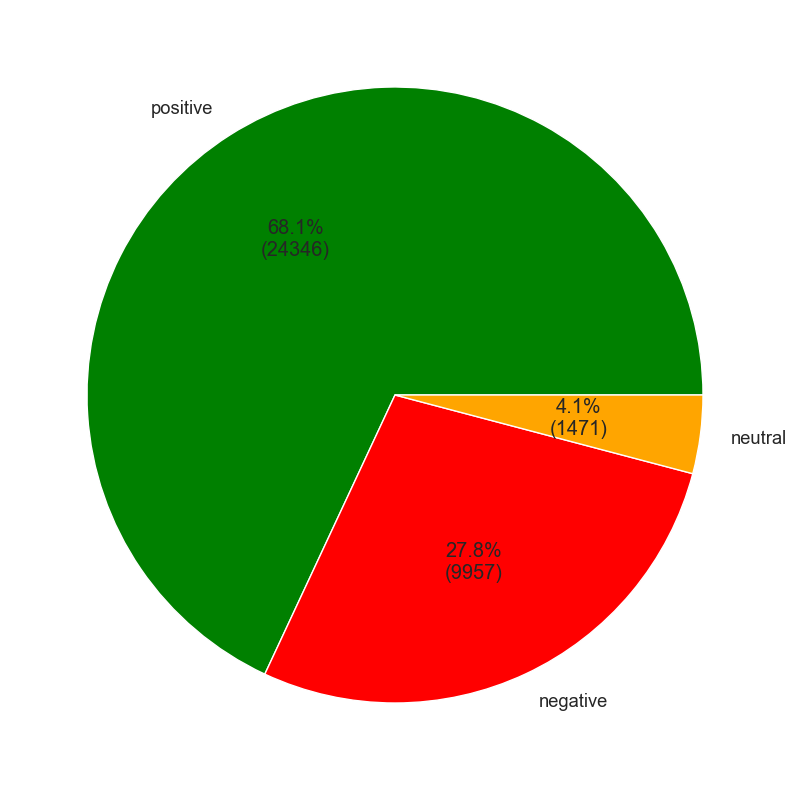

In [45]:
plt.figure(figsize=(13, 10))

# Define a function to format the autopct
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

s = df['sentiment_label'].value_counts()

# Define colors for each section
colors = ['green', 'red', 'orange']

# Plot the pie chart with colors
plt.pie(s, labels=s.index, autopct=autopct_format(s), colors=colors)

plt.show()


The above pie chart shows that the majority of reviews are Positive which is 66.8%
Negative reviews are 28% and Neutral reviews are 5.2%

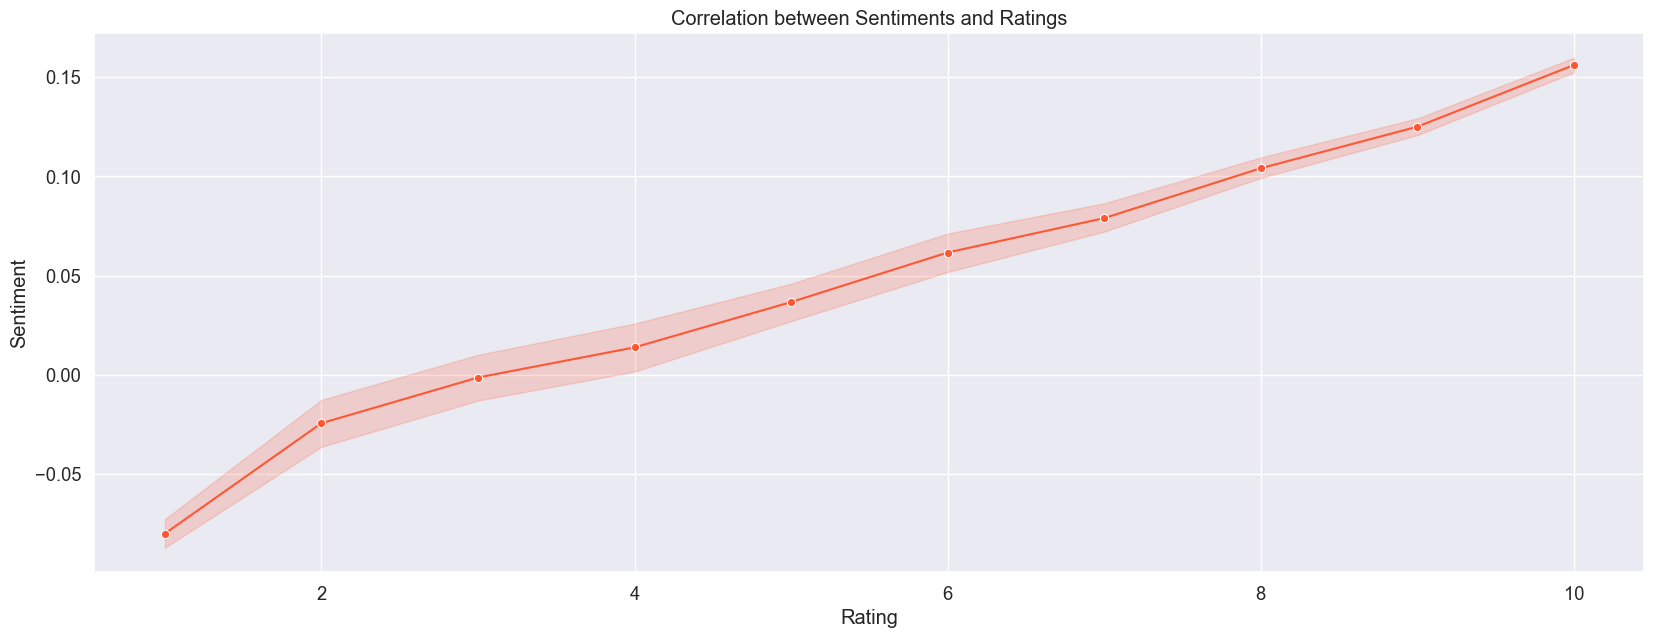

In [46]:
#Plotting a correlation between the Sentiments and Ratings
line_color = ['#FF5733']

sns.lineplot(data=df, x='rating', y='sentiment', color=line_color[0], marker='o')

plt.title('Correlation between Sentiments and Ratings')
plt.xlabel('Rating')
plt.ylabel('Sentiment')

plt.grid(True)
plt.show()

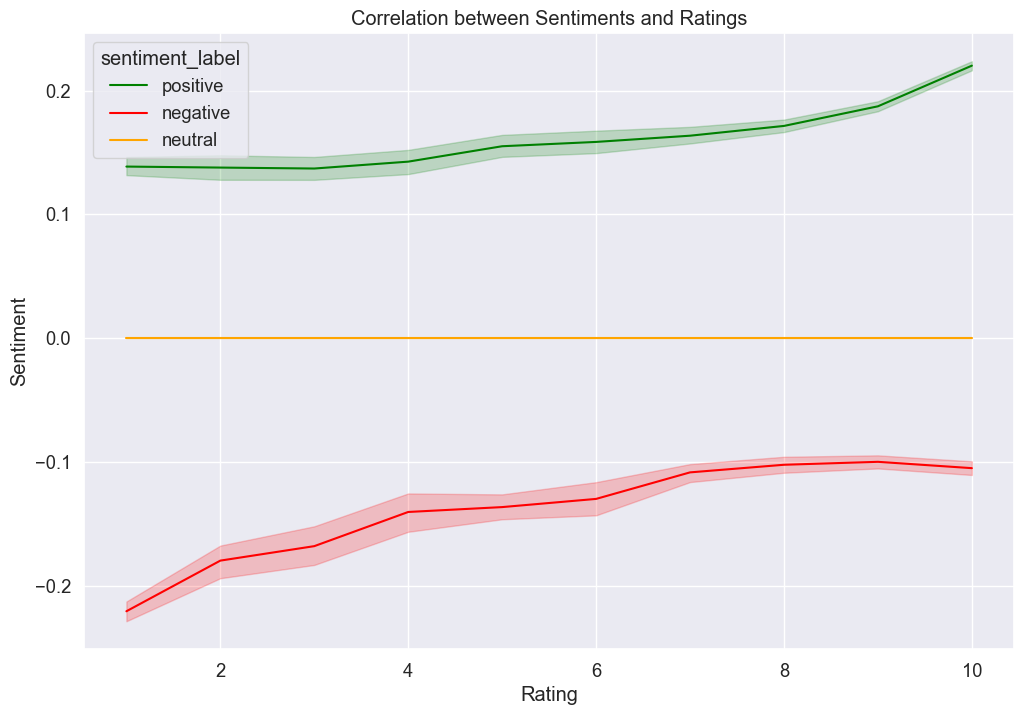

In [47]:
plt.figure(figsize=(12, 8))
colors = {'positive': 'green', 'neutral': 'orange', 'negative': 'red'}

sns.lineplot(data=df, x='rating', y='sentiment', hue='sentiment_label', palette=colors)

plt.title('Correlation between Sentiments and Ratings')
plt.xlabel('Rating')
plt.ylabel('Sentiment')

plt.grid(True)
plt.show()

In [48]:
def clean_review(review):
    # Convert to lowercase
    review = review.lower()

    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the review
    tokens = nltk.word_tokenize(review)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Join the cleaned tokens back together
    cleaned_review = ' '.join(tokens)

    return cleaned_review

In [49]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [50]:
df['review'] = df['review'].apply(lambda x: clean_review(x))

In [51]:
df.drop(['date'],axis=1,inplace=True)

In [52]:
df.head()

,drugName,condition,review,rating,usefulCount,effectiveness,sideEffectsReview,commentsReview,sideEffects,Review_Sentiment,sentiment,sentiment_label
1,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,192,Marginally Effective,"muscle pain, loss of mobility, depresion, head...",I take the drug once a day at night with a sma...,Extremely Severe Side Effects,1.0,0.168333,positive
11,L-methylfolate,Depression,taken antidepressants years improvement mostly...,10,54,Highly Effective,Increased risks for breast cancer and conditio...,Prescribed to take whenever flare-up for perio...,Extremely Severe Side Effects,1.0,0.275000,positive
15,Liraglutide,Obesity,taking saxenda since july 2016 severe nausea m...,9,20,Highly Effective,Mild drowsiness accompanied by a sense of well...,took one 5mg tablet daily in the am,No Side Effects,1.0,0.209259,positive
21,Trazodone,Insomnia,insomnia it039s horrible story begins pcp pres...,10,43,Moderately Effective,I have found that if I take it too early prior...,I pill a day and all has been well. =D,Mild Side Effects,1.0,0.061503,positive
27,Daytrana,ADHD,hi son 12 diagnosed 2nd grade tried everything...,10,11,Ineffective,I always experiencing oily bowel movement. I s...,The initial skin infection is clearing up.,Mild Side Effects,1.0,0.070798,positive


In [53]:
df["rating"] = df["rating"].astype(int)

In [54]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
reviews = vectorizer.fit_transform(df["review"])

In [55]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews, df["condition"], test_size=0.25, random_state=42)

Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
random_for = RandomForestClassifier()
random_for.fit(X_train, y_train)

RandomForestClassifier()

Accuracy of Random Forest model:  0.8521914132379249
                     precision    recall  f1-score   support

               ADHD       0.96      0.90      0.93       883
            Anxiety       0.87      0.77      0.82      1500
         Depression       0.80      0.94      0.86      2260
   Diabetes, Type 2       0.96      0.88      0.92       661
High Blood Pressure       0.93      0.85      0.89       560
           Insomnia       0.86      0.88      0.87       927
           Migraine       0.95      0.88      0.91       412
            Obesity       0.80      0.71      0.75       879
        Weight Loss       0.77      0.82      0.79       862

           accuracy                           0.85      8944
          macro avg       0.88      0.85      0.86      8944
       weighted avg       0.86      0.85      0.85      8944



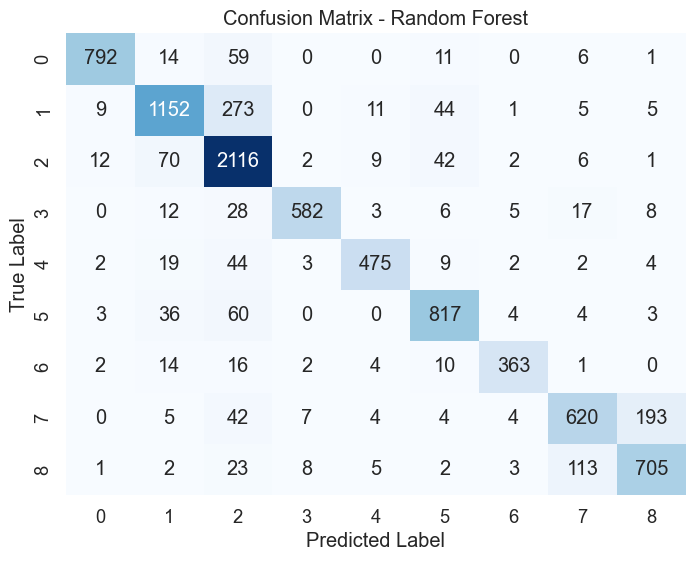

In [58]:
y_pred = random_for.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model: ", accuracy_rf)
print(classification_report(y_test, y_pred))

def plot_confusion_matrix(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Random Forest")

Support Vector Machine

In [59]:
from sklearn.svm import SVC

In [60]:
# Train the model
svm_mod = SVC()
svm_mod.fit(X_train, y_train)

SVC()

Accuracy of SVM model:  0.8606887298747764
                     precision    recall  f1-score   support

               ADHD       0.96      0.88      0.92       883
            Anxiety       0.87      0.80      0.84      1500
         Depression       0.80      0.93      0.86      2260
   Diabetes, Type 2       0.96      0.88      0.92       661
High Blood Pressure       0.92      0.84      0.88       560
           Insomnia       0.88      0.89      0.89       927
           Migraine       0.95      0.88      0.92       412
            Obesity       0.83      0.74      0.78       879
        Weight Loss       0.79      0.84      0.81       862

           accuracy                           0.86      8944
          macro avg       0.89      0.85      0.87      8944
       weighted avg       0.87      0.86      0.86      8944



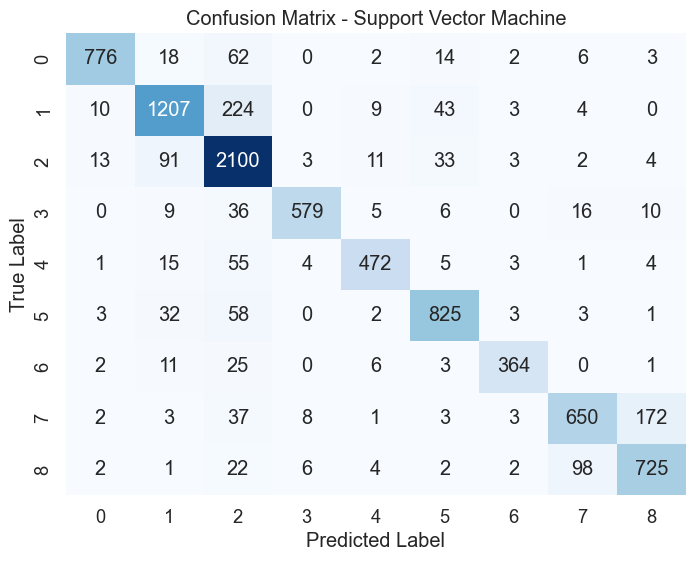

In [61]:
# Evaluate the model
y_pred = svm_mod.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model: ", accuracy_svm)
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Support Vector Machine")

Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
# Train the model
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy of Decision Tree model:  0.7839892665474061
                     precision    recall  f1-score   support

               ADHD       0.84      0.86      0.85       883
            Anxiety       0.77      0.76      0.76      1500
         Depression       0.78      0.81      0.79      2260
   Diabetes, Type 2       0.87      0.83      0.85       661
High Blood Pressure       0.85      0.76      0.80       560
           Insomnia       0.79      0.79      0.79       927
           Migraine       0.87      0.87      0.87       412
            Obesity       0.68      0.68      0.68       879
        Weight Loss       0.72      0.72      0.72       862

           accuracy                           0.78      8944
          macro avg       0.80      0.79      0.79      8944
       weighted avg       0.78      0.78      0.78      8944



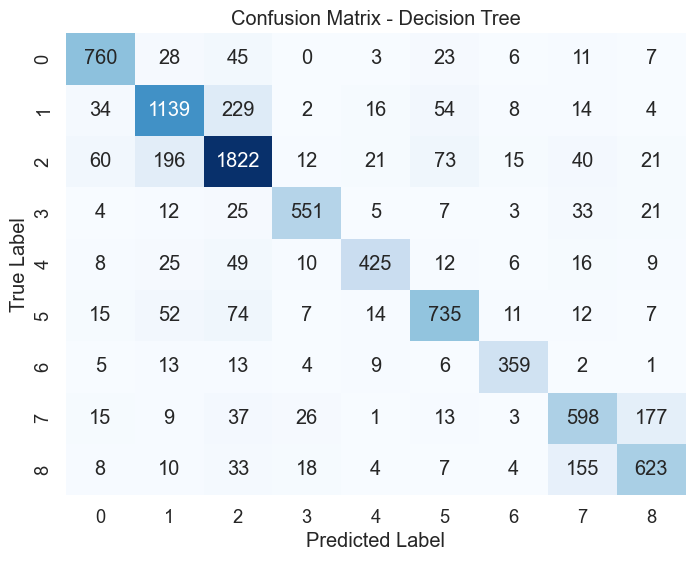

In [57]:
# Evaluate the model
y_pred = dec_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree model: ", accuracy_dt)
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Decision Tree")

Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Accuracy of Naive Bayes model:  0.5566860465116279
                     precision    recall  f1-score   support

               ADHD       0.99      0.36      0.53       883
            Anxiety       0.85      0.37      0.51      1500
         Depression       0.39      0.99      0.56      2260
   Diabetes, Type 2       0.98      0.46      0.63       661
High Blood Pressure       0.99      0.34      0.50       560
           Insomnia       0.98      0.42      0.58       927
           Migraine       1.00      0.19      0.32       412
            Obesity       0.78      0.44      0.56       879
        Weight Loss       0.68      0.62      0.65       862

           accuracy                           0.56      8944
          macro avg       0.85      0.46      0.54      8944
       weighted avg       0.76      0.56      0.55      8944



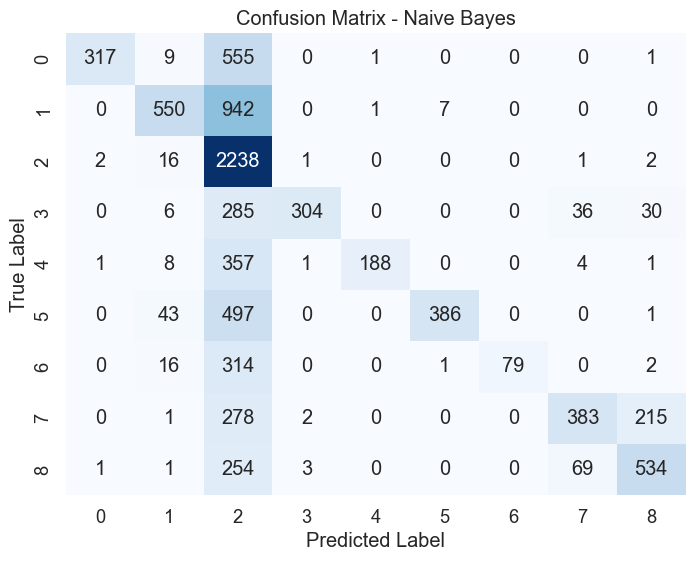

In [60]:
# Evaluate the model
y_pred = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes model: ", accuracy_nb)
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Naive Bayes")

Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
# Train the model
log_reg = LogisticRegression(multi_class="ovr")
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

Accuracy of Logistic Regression model:  0.8127236135957067
                     precision    recall  f1-score   support

               ADHD       0.94      0.84      0.88       883
            Anxiety       0.83      0.74      0.78      1500
         Depression       0.76      0.90      0.82      2260
   Diabetes, Type 2       0.93      0.85      0.89       661
High Blood Pressure       0.89      0.83      0.86       560
           Insomnia       0.85      0.87      0.86       927
           Migraine       0.93      0.86      0.90       412
            Obesity       0.73      0.66      0.69       879
        Weight Loss       0.71      0.72      0.71       862

           accuracy                           0.81      8944
          macro avg       0.84      0.81      0.82      8944
       weighted avg       0.82      0.81      0.81      8944



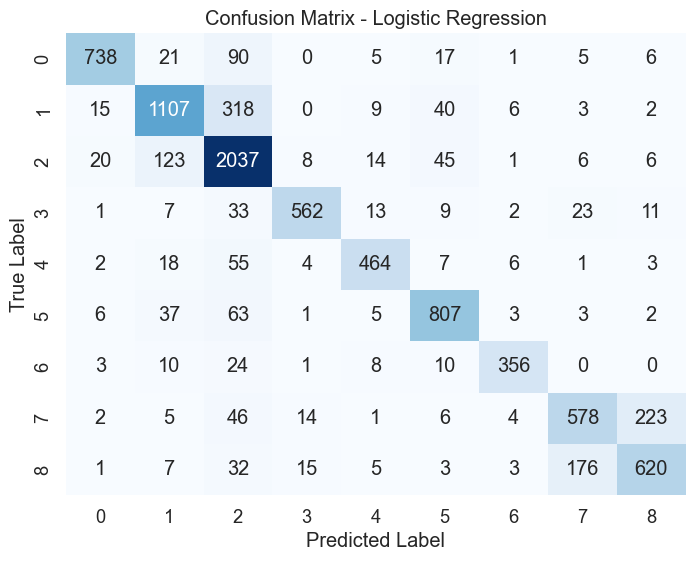

In [63]:
# Evaluate the model
y_pred = log_reg.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model: ", accuracy_lg)
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Logistic Regression")

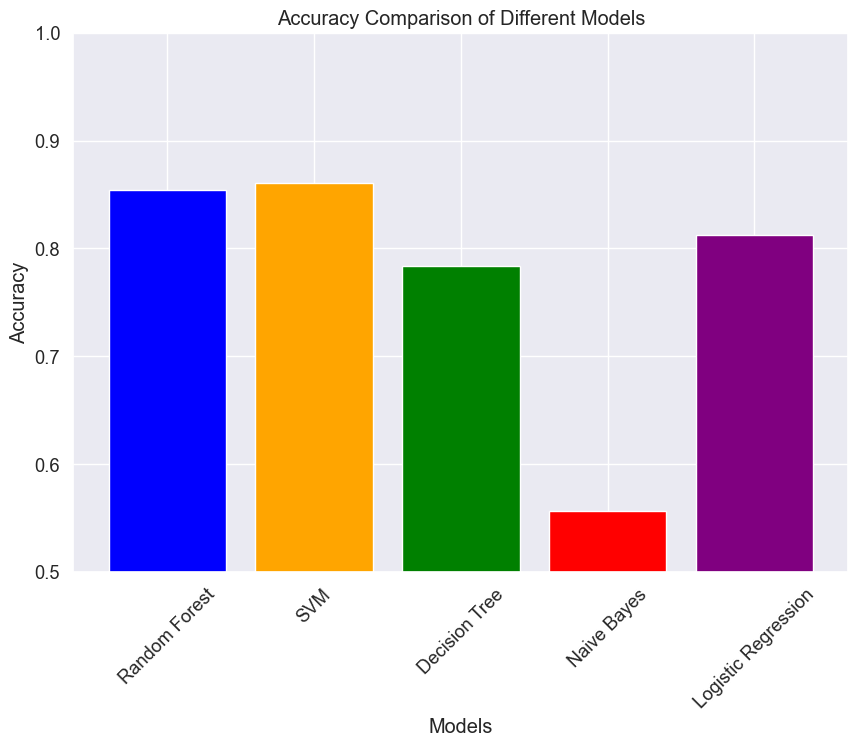

In [64]:
# Grouped bar plot for accuracy comparison
models = ['Random Forest', 'SVM', 'Decision Tree', 'Naive Bayes', 'Logistic Regression']
accuracies = [accuracy_rf, accuracy_svm, accuracy_dt, accuracy_nb, accuracy_lg]

plt.figure(figsize=(10, 7))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.xticks(rotation=45)
plt.show()